# Imports

In [1]:
import numpy as np
from sympy.physics.vector import *
from sympy import Abs
from sympy import *
from sympy import conjugate , I
from sympy import symbols, symbols
init_printing(use_latex=True)


In [2]:
t = Symbol('t', real=True) ## define variables and their type as symbols (string containing symbol which can be assigned to a variable)
c = Symbol('c', real=True)

# The program

This programm provided a simulation of the dynamics of a particle in 4/8 site periodic chain.
the Hamiltonian of the system is: $$H = -\frac{c}{2}(D+D^{\dagger})$$

In this simulation we would like to check the probabilty of a particle located at site $$ x = 1 $$ be in site $x$ at the end and measured $x$.

We demonstrate Trotter formula $2^{th}, 3^{th}$ order on 4/8 site system.

Beside that, all the matrix presentation $D+D^{\dagger}$ for 4/8 site system and $e^{-ictA}, e^{-ictB}, e^{-ictH}$were built to insert them to the IBM composer. 


In [4]:
## evaluate the evolution in time for the Hamiltonian
## n = dimansions, a,b,d,e,f,g,h,j = represent the eigenstate vector. for example (0,0,1,0,0,0,0,0)
def time_eve (n,a,b,d,e,f,g,h,j): 
    def norm(V):## normlize
        N = (V.dot(V,hermitian=True))**(-1/2) ## Hermitian dot prodact (transpose & conjugate)
        return N

## Creates 4 dimensions space
    if n==4: 
        Vspace=eye(n).columnspace()
        V_1=Vspace[0]
        V_2=Vspace[1]
        V_3=Vspace[2]
        V_4=Vspace[3]
      
 ## Creates normalize initial state - Psi(t=0)
        def psi_0 (a,b,d,e):
            U=a*V_1+b*V_2+d*V_3+e*V_4
            U=U*norm(U)
            return U
        psi_0 = psi_0 (a,b,d,e)

## Generate H - Hamiltonian
        def f(i,j): ##The functhion for the cells
            if i == j-1:
                return 1
            elif  j== i-1:
                return 1
            elif i==0 and j==n-1:
                return 1
            elif i==n-1 and j==0:
                return 1
            else:
                 return 0

## Degenition of H, P = eigenstats matrix, H_D = H_Diagonal, P_invers , U_t (evolotion operator)
## The P matrix tranfer from momentum to position base
        def hemiltonian(n,f):## H func
            return (-(c/2)*Matrix(n, n, f))

        H = hemiltonian(n,f)

        P,H_D=H.diagonalize(reals_only=False, sort=False, normalize=True) 

        P_1 = simplify(P.inv()) ## simplify mathematical expressions to the closest form such as: Sin**2(X)+cos**2(x) = 1  or  0.707 = sqrt(2)

        U_t = (-I*t*H_D).exp() ## evolution operator operets on the diagonal Hamiltonian (where "I" represent a complex number)

        def psi_t(f):
            psi_t=P*U_t*P_1*f
            return psi_t
        psi_t = psi_t(psi_0)

        return psi_0,simplify(psi_t) ,H , H_D ,U_t

## Creating 8 dimensions space
    elif n==8: 
        Vspace=eye(n).columnspace()
        V_1=Vspace[0]
        V_2=Vspace[1]
        V_3=Vspace[2]
        V_4=Vspace[3]
        V_5=Vspace[4]
        V_6=Vspace[5]
        V_7=Vspace[6]
        V_8=Vspace[7]
        
        def psi_0 (a,b,d,e,f,g,h,j): ##creates normalize initial state
            U=a*V_1+b*V_2+d*V_3+e*V_4+f*V_5+g*V_6+h*V_7+j*V_8
            U=U*norm(U)
            return U
        psi_0 = psi_0 (a,b,d,e,f,g,h,j)
        
## Generate H - Hamiltonian
        def f(i,j):##The functhion for the cells
            if i == j-1:
                return 1
            elif  j== i-1:
                return 1
            elif i==0 and j==n-1:
                return 1
            elif i==n-1 and j==0:
                return 1
            else:
                 return 0

## Degenition of H, P = eigenstats matrix, H_D = H_Diagonal, P_invers , U_t (evolotion operator)
## The P matrix tranfer from momentum to position base
        def hemiltonian(n,f):## H func
            return -(c/2)*Matrix(n, n, f)

        H = hemiltonian(n,f)

        P,H_D=H.diagonalize(reals_only=False, sort=False, normalize=True)## B is the eigenstats matrix and transformatihon from momentum to position, H_D is the diagonal matrix 

        P_1 = simplify(P.inv())

        U_t = (-I*t*H_D).exp() ## evolution operator on the diagonal Hamiltonian

        def psi_t(f):
            psi_t=P*U_t*P_1*f
            return psi_t
        psi_t = psi_t(psi_0)

        return psi_0,simplify(psi_t) ,H , H_D ,U_t

In [5]:
def prob(V,U):
    prob =simplify((abs(simplify(V.dot(U, hermitian=True)**2))))
    return prob

In [6]:
import matplotlib.pyplot as plt ##1d graph of prob for psi_1 in t =0 and psi 2 at t=t

psi_1 = time_eve(4,0,0,0,1,0,0,0,0)[0]
psi_2 = time_eve(4,0,0,0,1,0,0,0,0)[1] 

def graph (prob,z,psi_1,psi_2):
    c = Symbol('c', real=True)
    func = lambdify([c,t],prob(psi_1,psi_2))
    if func(1,1) == 1 :
        c=z
        plt.plot(np.arange(0,5,0.01),np.ones(len(np.arange(0,5,0.01))), label='probability graph ')

    else:
        c=z
        plt.plot(np.arange(0,5,0.01),func(c,np.arange(0,5,0.01)).real, label='probability graph ')
   
    plt.title("Probability of a particle over time",fontdict={"size":12})
    plt.xlabel("Time [s]", fontdict={"size":12})
    plt.ylabel("Probability [#]",fontdict={"size":12})
    print('the value of c is',c)
    plt.legend(loc='upper right',fontsize='large')


the value of c is 4


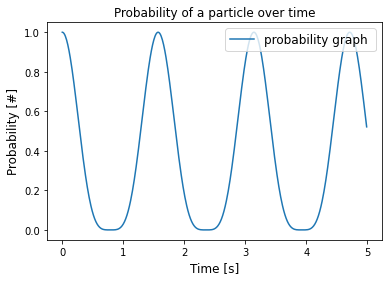

In [7]:
psi_1 =time_eve(4,1,0,0,0,0,0,0,0)[0]
psi_2 =time_eve(4,1,0,0,0,0,0,0,0)[1] 
graph (prob,4,psi_1,psi_2)

In [8]:
(-I*t*time_eve(4,1,0,0,0,0,0,0,0)[2]).exp()


⎡ ⅈ⋅c⋅t        -ⅈ⋅c⋅t     ⅈ⋅c⋅t    -ⅈ⋅c⋅t     ⅈ⋅c⋅t        -ⅈ⋅c⋅t     ⅈ⋅c⋅t   
⎢ℯ        1   ℯ          ℯ        ℯ          ℯ        1   ℯ          ℯ        
⎢────── + ─ + ───────    ────── - ───────    ────── - ─ + ───────    ────── - 
⎢  4      2      4         4         4         4      2      4         4      
⎢                                                                             
⎢   ⅈ⋅c⋅t    -ⅈ⋅c⋅t     ⅈ⋅c⋅t        -ⅈ⋅c⋅t     ⅈ⋅c⋅t    -ⅈ⋅c⋅t     ⅈ⋅c⋅t     
⎢  ℯ        ℯ          ℯ        1   ℯ          ℯ        ℯ          ℯ        1 
⎢  ────── - ───────    ────── + ─ + ───────    ────── - ───────    ────── - ─ 
⎢    4         4         4      2      4         4         4         4      2 
⎢                                                                             
⎢ ⅈ⋅c⋅t        -ⅈ⋅c⋅t     ⅈ⋅c⋅t    -ⅈ⋅c⋅t     ⅈ⋅c⋅t        -ⅈ⋅c⋅t     ⅈ⋅c⋅t   
⎢ℯ        1   ℯ          ℯ        ℯ          ℯ        1   ℯ          ℯ        
⎢────── - ─ + ───────    ────── - ───────    ────── 

the value of c is 7


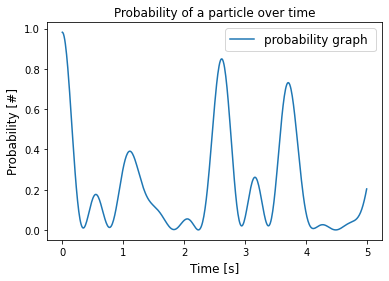

In [9]:
psi_1 =time_eve(8,0,0,0,1,0,1,10,0)[0]
psi_2 =time_eve(8,0,0,0,1,0,1,5,0)[1] 
graph (prob,7,psi_1,psi_2)

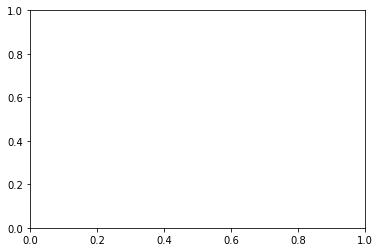

In [10]:
ax = plt.subplot() ##for plotting dont touch

In [11]:
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
x = Matrix([[0,1],[1,0]])
IDENT=Matrix([[1,0],[0,1]])
IDENTx = TensorProduct(IDENT, x)
IDENT=Matrix([[1,0],[0,1]])
cx=Matrix([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
cx_1=Matrix([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
ccx=Matrix([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,1],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0],[0,0,0,1,0,0,0,0]]) 
IDENTcx=TensorProduct(IDENT, cx)
IDENTx=TensorProduct(IDENT, x)
IDENTIDENTx=TensorProduct(IDENT, IDENTx)
DT = cx*IDENTx ## The Translation Operator Ddagger for 4 site system
D = IDENTx*cx ## The Translation Operator D for 4 site system
D8=ccx*IDENTcx*IDENTIDENTx ## The Translation Operator D for 8 site system
D8T=IDENTIDENTx*IDENTcx*ccx ## The Translation Operator D dagger for 8 site system

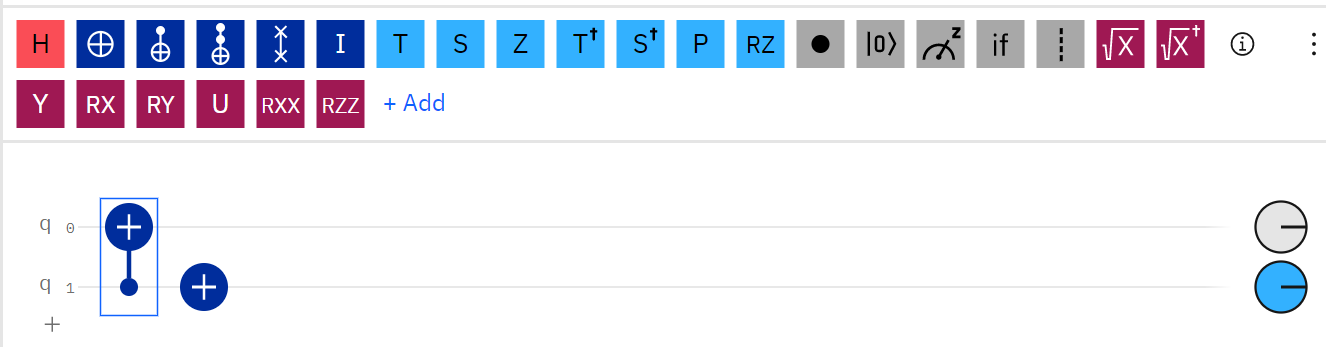

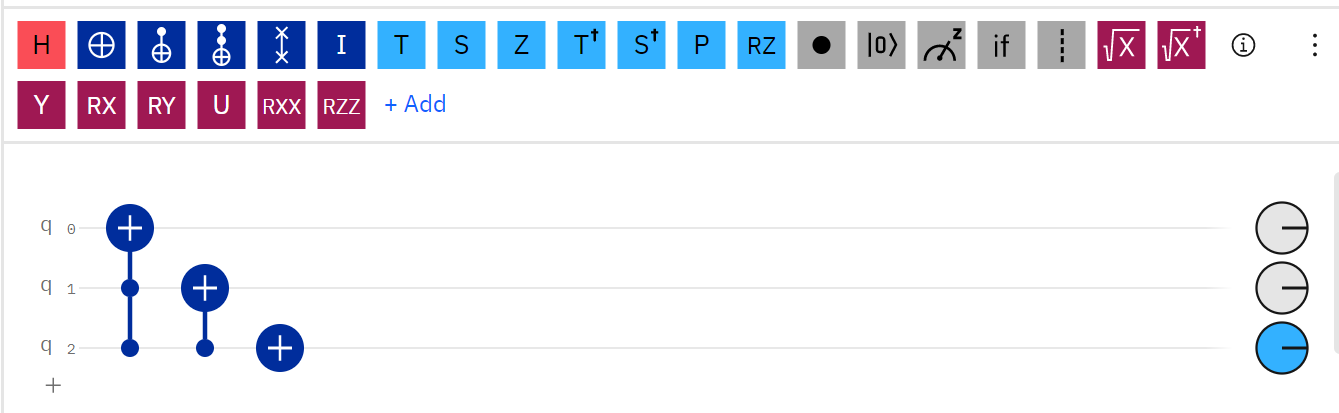

In [12]:
## the presentaion of expH matrix and its gates for the IBM Composer
theta = pi
lam = -1/2*c*t ## insert the angles
phi = 1/2*c*t ## insert the angles

x = Matrix([[0,1],[1,0]]) ## note gate
z = Matrix([[1,0],[0,-1]]) ## Pauli z
U = Matrix([[cos(theta/2),-exp(I*lam)*sin(theta/2)],[exp(I*phi)*sin(theta/2),exp(I*(phi+lam))*cos(theta/2)]]) ## General rotation matrix
P = Matrix([[1,0],[0,exp(-I*c*t)]]) ## Phase matrix
P_1 = Matrix([[1,0],[0,exp(I*c*t)]]) ## diffrent phase matrix
T = (U*z)*x
S = (x*U)*z
H = TensorProduct(T,S) *cx * TensorProduct(P_1, IDENT) *cx* TensorProduct(P, IDENT)
H, U, T, S, P, P_1, x, z, IDENT, cx, H - time_eve(4,1,0,0,0,0,0,0,0)[4]


⎛⎡1  0      0          0   ⎤                                                  
⎜⎢                         ⎥                                                  
⎜⎢0  1      0          0   ⎥  ⎡              -0.5⋅ⅈ⋅c⋅t⎤  ⎡ -0.5⋅ⅈ⋅c⋅t        
⎜⎢                         ⎥  ⎢    0       -ℯ          ⎥  ⎢ℯ                0 
⎜⎢       1.0⋅ⅈ⋅c⋅t         ⎥, ⎢                        ⎥, ⎢                   
⎜⎢0  0  ℯ              0   ⎥  ⎢ 0.5⋅ⅈ⋅c⋅t              ⎥  ⎢              0.5⋅ⅈ
⎜⎢                         ⎥  ⎣ℯ                0      ⎦  ⎣     0       ℯ     
⎜⎢                   -ⅈ⋅c⋅t⎥                                                  
⎝⎣0  0      0       ℯ      ⎦                                                  

                                                                              
                                                                              
    ⎤  ⎡ 0.5⋅ⅈ⋅c⋅t             ⎤  ⎡1     0   ⎤  ⎡1    0   ⎤                   
    ⎥  ⎢ℯ                0     ⎥  ⎢          ⎥  ⎢  

In [194]:
theta_1 = -c*t
RX = Matrix([[cos(theta_1/2),-I*sin(theta_1/2)],[-I*sin(theta_1/2),cos(theta_1/2)]])

H_New =  TensorProduct(IDENT,RX) *cx * TensorProduct(IDENT,RX) *cx
RX, H_New

⎛                          ⎡        2⎛c⋅t⎞            ⎛c⋅t⎞    ⎛c⋅t⎞          
⎜                          ⎢     cos ⎜───⎟       ⅈ⋅sin⎜───⎟⋅cos⎜───⎟      -sin
⎜                          ⎢         ⎝ 2 ⎠            ⎝ 2 ⎠    ⎝ 2 ⎠          
⎜                          ⎢                                                  
⎜⎡    ⎛c⋅t⎞        ⎛c⋅t⎞⎤  ⎢     ⎛c⋅t⎞    ⎛c⋅t⎞          2⎛c⋅t⎞            ⎛c⋅
⎜⎢ cos⎜───⎟   ⅈ⋅sin⎜───⎟⎥  ⎢ⅈ⋅sin⎜───⎟⋅cos⎜───⎟       cos ⎜───⎟       ⅈ⋅sin⎜──
⎜⎢    ⎝ 2 ⎠        ⎝ 2 ⎠⎥  ⎢     ⎝ 2 ⎠    ⎝ 2 ⎠           ⎝ 2 ⎠            ⎝ 2
⎜⎢                      ⎥, ⎢                                                  
⎜⎢     ⎛c⋅t⎞      ⎛c⋅t⎞ ⎥  ⎢        2⎛c⋅t⎞            ⎛c⋅t⎞    ⎛c⋅t⎞          
⎜⎢ⅈ⋅sin⎜───⎟   cos⎜───⎟ ⎥  ⎢    -sin ⎜───⎟       ⅈ⋅sin⎜───⎟⋅cos⎜───⎟       cos
⎜⎣     ⎝ 2 ⎠      ⎝ 2 ⎠ ⎦  ⎢         ⎝ 2 ⎠            ⎝ 2 ⎠    ⎝ 2 ⎠          
⎜                          ⎢                                                  
⎜                          ⎢     ⎛c⋅t⎞    ⎛c⋅t⎞     

In [16]:
A =-c/2 *Matrix([[0, 1,0,0,], [1, 0,0,0,], [0, 0,0,1],[0, 0,1,0]])
expA=(-I*t*A).exp() 

theta_1 = -c*t
RX = Matrix([[cos(theta_1/2),-I*sin(theta_1/2)],[-I*sin(theta_1/2),cos(theta_1/2)]])
A_new = TensorProduct(IDENT, RX)

A_new, expA, simplify(A_new - expA)

⎛                                                  ⎡ ⅈ⋅c⋅t    -ⅈ⋅c⋅t    ⅈ⋅c⋅t 
⎜                                                  ⎢ ─────    ───────   ───── 
⎜                                                  ⎢   2         2        2   
⎜                                                  ⎢ℯ        ℯ         ℯ      
⎜                                                  ⎢────── + ────────  ────── 
⎜                                                  ⎢  2         2        2    
⎜⎡    ⎛c⋅t⎞        ⎛c⋅t⎞                        ⎤  ⎢                          
⎜⎢ cos⎜───⎟   ⅈ⋅sin⎜───⎟      0           0     ⎥  ⎢ ⅈ⋅c⋅t    -ⅈ⋅c⋅t    ⅈ⋅c⋅t 
⎜⎢    ⎝ 2 ⎠        ⎝ 2 ⎠                        ⎥  ⎢ ─────    ───────   ───── 
⎜⎢                                              ⎥  ⎢   2         2        2   
⎜⎢     ⎛c⋅t⎞      ⎛c⋅t⎞                         ⎥  ⎢ℯ        ℯ         ℯ      
⎜⎢ⅈ⋅sin⎜───⎟   cos⎜───⎟       0           0     ⎥  ⎢────── - ────────  ────── 
⎜⎢     ⎝ 2 ⎠      ⎝ 2 ⎠                         ⎥  ⎢

In [17]:
## the presentaion of expB matrix and its gates for the IBM Composer
B =-c/2 * Matrix([[0, 0,0,1], [0, 0,1,0,], [0, 1,0,0],[1, 0,0,0]])
expB=(-I*t*B).exp()

B_new=DT*expA*D
B_new, expB, simplify(B_new - expB)

⎛⎡ ⅈ⋅c⋅t    -ⅈ⋅c⋅t                                          ⅈ⋅c⋅t    -ⅈ⋅c⋅t ⎤ 
⎜⎢ ─────    ───────                                         ─────    ───────⎥ 
⎜⎢   2         2                                              2         2   ⎥ 
⎜⎢ℯ        ℯ                                               ℯ        ℯ       ⎥ 
⎜⎢────── + ────────          0                  0          ────── - ────────⎥ 
⎜⎢  2         2                                              2         2    ⎥ 
⎜⎢                                                                          ⎥ 
⎜⎢                    ⅈ⋅c⋅t    -ⅈ⋅c⋅t    ⅈ⋅c⋅t    -ⅈ⋅c⋅t                    ⎥ 
⎜⎢                    ─────    ───────   ─────    ───────                   ⎥ 
⎜⎢                      2         2        2         2                      ⎥ 
⎜⎢                   ℯ        ℯ         ℯ        ℯ                          ⎥ 
⎜⎢        0          ────── + ────────  ────── - ────────          0        ⎥ 
⎜⎢                     2         2        2         

In [18]:
## the presentaion of expA matrix for 8 site system
A_8 =-c/2 *Matrix([[0, 1,0,0,0,0,0,0], [1, 0,0,0,0,0,0,0], [0, 0,0,1,0,0,0,0],[0, 0,1,0,0,0,0,0],[0, 0,0,0,0,1,0,0],[0, 0,0,0,1,0,0,0],[0, 0,0,0,0,0,0,1],[0, 0,0,0,0,0,1,0]])
expA_8=(-I*t*A_8).exp()
expA_8

⎡ ⅈ⋅c⋅t    -ⅈ⋅c⋅t    ⅈ⋅c⋅t    -ⅈ⋅c⋅t                                          
⎢ ─────    ───────   ─────    ───────                                         
⎢   2         2        2         2                                            
⎢ℯ        ℯ         ℯ        ℯ                                                
⎢────── + ────────  ────── - ────────          0                  0           
⎢  2         2        2         2                                             
⎢                                                                             
⎢ ⅈ⋅c⋅t    -ⅈ⋅c⋅t    ⅈ⋅c⋅t    -ⅈ⋅c⋅t                                          
⎢ ─────    ───────   ─────    ───────                                         
⎢   2         2        2         2                                            
⎢ℯ        ℯ         ℯ        ℯ                                                
⎢────── - ────────  ────── + ────────          0                  0           
⎢  2         2        2         2                   

In [19]:
## the presentaion of expB matrix for 8 site system
B_8 =-c/2 *Matrix([[0, 0,0,0,0,0,0,1], [0, 0,1,0,0,0,0,0], [0, 1,0,0,0,0,0,0],[0, 0,0,0,1,0,0,0],[0, 0,0,1,0,0,0,0],[0, 0,0,0,0,0,1,0],[0, 0,0,0,0,1,0,0],[1, 0,0,0,0,0,0,0]])
expB_8=(-I*t*B_8).exp()
expB_8


⎡ ⅈ⋅c⋅t    -ⅈ⋅c⋅t                                                             
⎢ ─────    ───────                                                            
⎢   2         2                                                               
⎢ℯ        ℯ                                                                   
⎢────── + ────────          0                  0                  0           
⎢  2         2                                                                
⎢                                                                             
⎢                    ⅈ⋅c⋅t    -ⅈ⋅c⋅t    ⅈ⋅c⋅t    -ⅈ⋅c⋅t                       
⎢                    ─────    ───────   ─────    ───────                      
⎢                      2         2        2         2                         
⎢                   ℯ        ℯ         ℯ        ℯ                             
⎢        0          ────── + ────────  ────── - ────────          0           
⎢                     2         2        2         2

In [20]:
## here is all the trotter functhions, we hange from symbolic to numeric calculations, because of the speed of the procces
def trot_4_2_1 (f,n,k,T):
    psi_4_2_1=np.zeros(n*4, dtype=complex).reshape(n,4)
    s = (c, t)
    expB=(-I*t/n*B).exp()
    B_func = lambdify(s, expB, modules='numpy')
    expA=(-I*t/n*A).exp()
    A_func = lambdify(s,  expA, modules='numpy')
    for z in range (0,n):
        s = (k, (T/n)*z)
        for l in range (0,n):
            if l == 0:
                psi_t=np.matmul(A_func(k, (T/n)*z),np.matmul(B_func(k, (T/n)*z), f[0]))
            else:
                psi_a = np.matmul(A_func(k, (T/n)*z),np.matmul(B_func(k, (T/n)*z), psi_t))
                psi_t=psi_a
                psi_4_2_1[z]=np.transpose(np.fromiter(psi_t,dtype=complex))
    return psi_4_2_1

def trot_4_3_1 (f,n,k,T):
    psi_4_3_1=np.zeros(n*4, dtype=complex).reshape(n,4)
    s = (c, t)
    expB=(-I*t/n*B).exp()
    B_func = lambdify(s, expB, modules='numpy')
    expA=(-I*t/(2*n)*A).exp()
    A_func = lambdify(s,  expA, modules='numpy')
    for z in range (0,n):
        s = (k, (T/n)*z)
        for l in range (0,n):
            if l == 0:
                psi_t=np.matmul(A_func(k, (T/n)*z),np.matmul(B_func(k, (T/n)*z),np.matmul(A_func(k, (T/n)*z), f[0])))
            else:
                psi_a = np.matmul(A_func(k, (T/n)*z),np.matmul(B_func(k, (T/n)*z), np.matmul(A_func(k, (T/n)*z),psi_t)))
                psi_t=psi_a
                psi_4_3_1[z]=np.transpose(np.fromiter(psi_t,dtype=complex))
    return psi_4_3_1

def trot_8_2_1 (f,n,k,T):
    psi_8_2_1=np.zeros(n*8, dtype=complex).reshape(n,8)
    s = (c, t)
    expB=(-I*t/n*B_8).exp()
    B_func = lambdify(s, expB, modules='numpy')
    expA=(-I*t/n*A_8).exp()
    A_func = lambdify(s,  expA, modules='numpy')
    for z in range (0,n):
        s = (k, (T/n)*z)
        for l in range (0,n):
            if l == 0:
                psi_t=np.matmul(A_func(k, (T/n)*z),np.matmul(B_func(k, (T/n)*z), f[0]))
            else:
                psi_a = np.matmul(A_func(k, (T/n)*z),np.matmul(B_func(k, (T/n)*z), psi_t))
                psi_t=psi_a
                psi_8_2_1[z]=np.transpose(np.fromiter(psi_t,dtype=complex))
    return psi_8_2_1

def trot_8_3_1 (f,n,k,T):
    psi_8_3_1=np.zeros(n*8, dtype=complex).reshape(n,8)
    s = (c, t)
    expB=(-I*t/n*B_8).exp()
    B_func = lambdify(s, expB, modules='numpy')
    expA=(-I*t/(2*n)*A_8).exp()
    A_func = lambdify(s,  expA, modules='numpy')
    for z in range (0,n):
        s = (k, (T/n)*z)
        for l in range (0,n):
            if l == 0:
                psi_t=np.matmul(A_func(k, (T/n)*z),np.matmul(B_func(k, (T/n)*z),np.matmul(A_func(k, (T/n)*z), f[0])))
            else:
                psi_a = np.matmul(A_func(k, (T/n)*z),np.matmul(B_func(k, (T/n)*z), np.matmul(A_func(k, (T/n)*z),psi_t)))
                psi_t=psi_a
                psi_8_3_1[z]=np.transpose(np.fromiter(psi_t,dtype=complex))
    return psi_8_3_1

In [21]:
##logisitic part to create all the Suervivl prob garph easiliy
prob_saver=np.zeros(40)
Trot_4_2_1=trot_4_2_1 (time_eve(4,1,0,0,0,0,0,0,0),40,5,4)

Trot_4_3_1=trot_4_3_1 (time_eve(4,1,0,0,0,0,0,0,0),40,5,4)
 


 
    

In [163]:
def exact_graph (prob,z,psi_1,psi_2):
    c = Symbol('c', real=True)
    func = lambdify([c,t],prob(psi_1,psi_2))
    if func(1,1) == 1 :
        c=z
        plt.plot(np.arange(0,2,0.01),np.ones(len(np.arange(0,2,0.1))),label='probability graph ')

    else:
        c=z
        plt.plot(np.arange(0,4,0.01),func(c,np.arange(0,4,0.01)).real,'bo',label='exact ',markersize=2)
   
    plt.title("Suervival Probability of a particle over time , 4 site system, exact",fontdict={"size":12})
    plt.xlabel("Time [s]", fontdict={"size":12})
    plt.ylabel("Probability [#]",fontdict={"size":12})
    plt.legend(loc='upper right',fontsize='large')
 
def survivelprob_trotter4_2(T,U,n):
    for i in range (0,n):    
        prob_saver[i]=np.abs(np.matmul(np.array([1,0,0,0]),U[i]))**2
    
    plt.plot(np.arange(0,T,T/n),prob_saver.real,'r^', label='order 1 ' )
    plt.title("surevival probability graph for 1 order trotter 4 site system",fontdict={"size":12})
    plt.xlabel("Time [s]", fontdict={"size":12})
    plt.ylabel("Probability [#]",fontdict={"size":12})
    plt.legend(loc='upper right',fontsize='large')

def survivelprob_trotter4_3(T,U,n):
    for i in range (0,n):    
        prob_saver[i]=np.abs(np.matmul(np.array([1,0,0,0]),U[i]))**2
    
    plt.plot(np.arange(0,T,T/n),prob_saver.real,'g*', label='order 2 ')
    plt.title("Survival probability graph, 4 sites,c=5 ",fontdict={"size":12})
    plt.xlabel("Time [s]", fontdict={"size":12})
    plt.ylabel("Probability [#]",fontdict={"size":12})
    plt.legend(loc='upper right',fontsize='large')   

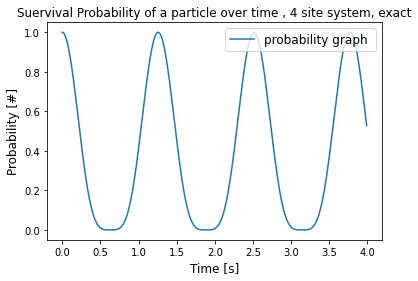

In [22]:
exact_graph(prob,5,time_eve(4,1,0,0,0,0,0,0,0)[0],time_eve(4,1,0,0,0,0,0,0,0)[1])

 

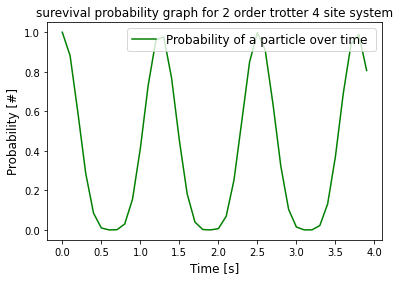

In [23]:
survivelprob_trotter4_2(4,Trot_4_2_1,40)  

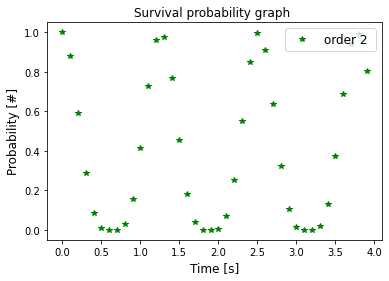

In [62]:
survivelprob_trotter4_3(4,Trot_4_3_1,40) 

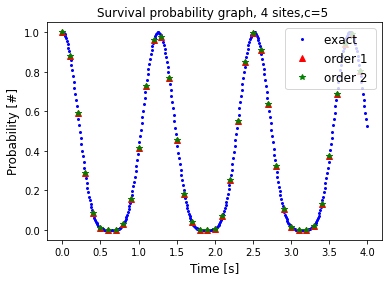

In [164]:
exact_graph(prob,5,time_eve(4,1,0,0,0,0,0,0,0)[0],time_eve(4,1,0,0,0,0,0,0,0)[1])
survivelprob_trotter4_2(4,Trot_4_2_1,40)  
survivelprob_trotter4_3(4,Trot_4_3_1,40)  

In [154]:
Trot_4_2_1_long=trot_4_2_1 (time_eve(4,1,0,0,0,0,0,0,0),40,5,20)

Trot_4_3_1_long=trot_4_3_1 (time_eve(4,1,0,0,0,0,0,0,0),40,5,20)



In [161]:
def exact_graph_long (prob,z,psi_1,psi_2):
    c = Symbol('c', real=True)
    func = lambdify([c,t],prob(psi_1,psi_2))
    if func(1,1) == 1 :
        c=z
        plt.plot(np.arange(0,2,0.01),np.ones(len(np.arange(0,2,0.1))),label='probability graph ')

    else:
        c=z
        plt.plot(np.arange(0,20,0.01),func(c,np.arange(0,20,0.01)).real,'bo',label='exact ',markersize=1)
   
    plt.title("Suervival Probability of a particle over time , 4 site system, exact",fontdict={"size":12})
    plt.xlabel("Time [s]", fontdict={"size":12})
    plt.ylabel("Probability [#]",fontdict={"size":12})
    plt.legend(loc='upper right',fontsize='large')

    

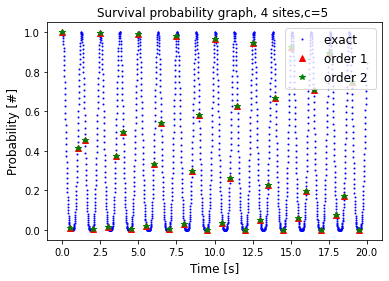

In [167]:
exact_graph_long(prob,5,time_eve(4,1,0,0,0,0,0,0,0)[0],time_eve(4,1,0,0,0,0,0,0,0)[1])
survivelprob_trotter4_2(20,Trot_4_2_1_long,40)  
survivelprob_trotter4_3(20,Trot_4_2_1_long,40)  

In [25]:
##2d graph functhion 4 sites
v_1n=np.array([1,0,0,0])
v_2n=np.array([0,1,0,0])
v_3n=np.array([0,0,1,0])
v_4n=np.array([0,0,0,1])
def d2_4sites_trot(U): ##Crerates discrete p(x,t) as a matrix for the plot
    z=np.zeros([40,4])
    for i in range(0,4):
        for l in range (0,40):
            if i ==0 :
                z[l][i] = np.abs(np.matmul(v_1n,U[l]))**2
            if i ==1 :
                z[l][i] = np.abs(np.matmul(v_2n,U[l]))**2
            if i ==2 :
                z[l][i] = np.abs(np.matmul(v_3n,U[l]))**2
            if i ==3 :
                z[l][i] = np.abs(np.matmul(v_4n,U[l]))**2
            
              
    return z

In [ ]:
## Exact
##plot 2d graph P(x,t) for 4 sites
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Vspace=eye(4).columnspace()##construct the sites Vectors in the standart base
V_1=Vspace[0] ##vector for the site x=1
V_2=Vspace[1]
V_3=Vspace[2]
V_4=Vspace[3]

def d2_4sites(b,T,time_eve): ##Crerates discrete p(x,t) as a matrix for the plot
    t = Symbol('t', real=True)
    c = Symbol('c', real=True) 
    func_1 = lambdify([c,t],prob(V_1,time_eve[1]))#prob func for x=1, meanning to be in site 1
    func_2 = lambdify([c,t],prob(V_2,time_eve[1]))
    func_3 = lambdify([c,t],prob(V_3,time_eve[1]))
    func_4 = lambdify([c,t],prob(V_4,time_eve[1]))
    c=b
    t=np.arange(0,T,0.01)
    z=np.zeros(4*int(T/0.01)).reshape(int(T/0.01),4)
    for j in range(0,4):
        for l in range (0,int(T/0.01)):
            if j ==0 :
                z[l][j] = func_1(c,t[l]).real
            if j ==1 :
                z[l][j] = func_2(c,t[l]).real
            if j ==2 :
                z[l][j] = func_3(c,t[l]).real
            if j ==3 :
                z[l][j] = func_4(c,t[l]).real
            
              
    return z
## c=b ,and one have to choose this value        
plt.contourf(np.arange(1,5,1), np.arange(0,4,0.01), d2_4sites(5,4,time_eve(4,1,0,0,0,0,0,0,0))) # plotting our solution

# plt.colorbar(ax.imshow(d2_4sites(5,4,time_eve(4,1,0,0,0,0,0,0,0))))## one have to change the functhion here as well
# plt.title('P(x,t),for 4 sites system,exact', fontsize=14)
# plt.xlabel('x [site]', fontsize=14)
# plt.ylabel('t [s]', fontsize=14)
# plt.show()

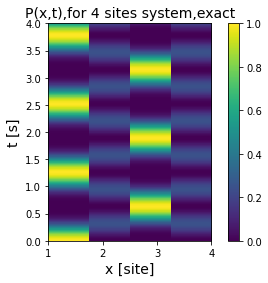

In [26]:

plt.imshow( d2_4sites(5,4,time_eve(4,1,0,0,0,0,0,0,0)),extent=[1,4,0,4],interpolation='none',origin='lower') # plotting our solution 

plt.colorbar(ax.imshow(d2_4sites(5,4,time_eve(4,1,0,0,0,0,0,0,0))))## one have to change the functhion here as well
plt.title('P(x,t),for 4 sites system,exact', fontsize=14)
plt.xlabel('x [site]', fontsize=14)
plt.ylabel('t [s]', fontsize=14)
plt.show()

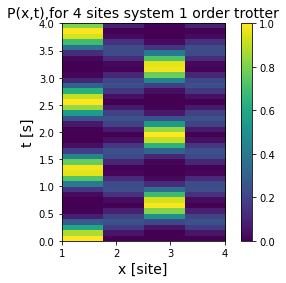

In [119]:
plt.imshow(( d2_4sites_trot(Trot_4_2_1)),extent=[1,4,0,4],interpolation='none',origin='lower') # plotting our solution 
plt.colorbar(ax.imshow(d2_4sites_trot(Trot_4_2_1)))## one have to change the functhion here as well
plt.title('P(x,t),for 4 sites system 1 order trotter', fontsize=14)
plt.xlabel('x [site]', fontsize=14)
plt.ylabel('t [s]', fontsize=14)
plt.show()

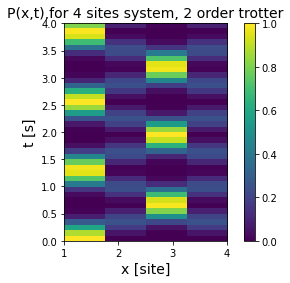

In [120]:
plt.imshow(( d2_4sites_trot(Trot_4_3_1)),extent=[1,4,0,4],interpolation='none',origin='lower') # plotting our solution 
plt.colorbar(ax.imshow(d2_4sites_trot(Trot_4_3_1)))## one have to change the functhion here as well
plt.title('P(x,t),for 4 sites system, 2 order trotter', fontsize=14)
plt.xlabel('x [site]', fontsize=14)
plt.ylabel('t [s]', fontsize=14)
plt.show()

In [31]:
##logisitic part to create all the Suervivl prob garphs easiliy for 8 site system
prob_saver=np.zeros(40)
Trot_8_2_1=trot_8_2_1 (time_eve(8,1,0,0,0,0,0,0,0),40,8,4)
Trot_8_3_1=trot_8_3_1 (time_eve(8,1,0,0,0,0,0,0,0),40,8,4)



In [ ]:
def graph_8_exact (prob,z,psi_1,psi_2):
    c = Symbol('c', real=True)
    func = lambdify([c,t],prob(psi_1,psi_2))
    if func(1,1) == 1 :
        c=z
        plt.plot(np.arange(0,4,0.01),np.ones(len(np.arange(0,4,0.01))),label='probability graph ')

    else:
        c=z
        plt.plot(np.arange(0,4,0.01),func(c,np.arange(0,4,0.1)),'bo',label='exact ',markersize=2)
   
    plt.title("Suervival Probability of a particle over time, exact",fontdict={"size":12})
    plt.xlabel("Time [s]", fontdict={"size":12})
    plt.ylabel("Probability [#]",fontdict={"size":12})
    plt.legend(loc='upper right',fontsize='large')


def survivelprob_trotter8_2(T,U):
    for i in range (0,40):    
        prob_saver[i]=np.abs(np.matmul(np.array([1,0,0,0,0,0,0,0]),U[i]))**2
    
    plt.plot(np.arange(0,T,T/40),prob_saver.real,'r^', label='order 1 ')
    plt.title("surevival probability graph for 1 order trotter 8 site system",fontdict={"size":12})
    plt.xlabel("Time [s]", fontdict={"size":12})
    plt.ylabel("Probability [#]",fontdict={"size":12})
    plt.legend(loc='upper right',fontsize='large')

def survivelprob_trotter8_3(T,U):
    for i in range (0,40):    
        prob_saver[i]=np.abs(np.matmul(np.array([1,0,0,0,0,0,0,0]),U[i]))**2
    
    plt.plot(np.arange(0,T,T/40),prob_saver.real,'g*', label='order 2 ')
    plt.title("Survival probability graph 8 sites, c=8 ",fontdict={"size":12})
    plt.xlabel("Time [s]", fontdict={"size":12})
    plt.ylabel("Probability [#]",fontdict={"size":12})
    plt.legend(loc='upper right',fontsize='large')    
    
    
 
    


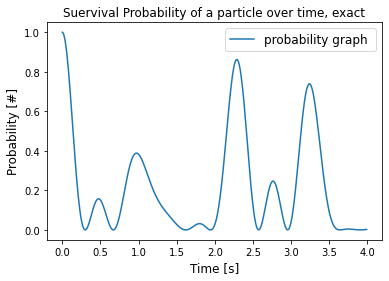

In [32]:
graph_8_exact(prob,8,time_eve(8,1,0,0,0,0,0,0,0)[0],time_eve(8,1,0,0,0,0,0,0,0)[1])

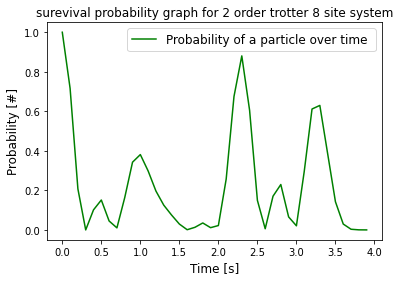

In [33]:
survivelprob_trotter8_2(4,Trot_8_2_1)

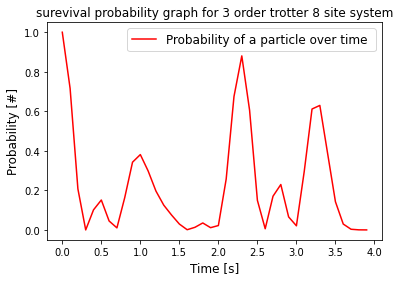

In [34]:
survivelprob_trotter8_3(4,Trot_8_3_1)

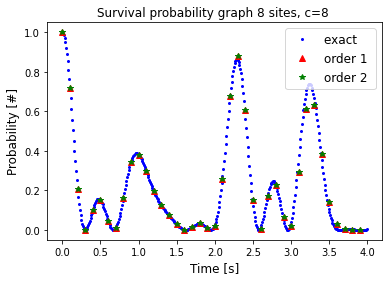

In [70]:
graph_8_exact(prob,8,time_eve(8,1,0,0,0,0,0,0,0)[0],time_eve(8,1,0,0,0,0,0,0,0)[1])
survivelprob_trotter8_2(4,Trot_8_2_1)
survivelprob_trotter8_3(4,Trot_8_3_1)

In [152]:
def graph_8_exact_long (prob,z,psi_1,psi_2):
    c = Symbol('c', real=True)
    func = lambdify([c,t],prob(psi_1,psi_2))
    if func(1,1) == 1 :
        c=z
        plt.plot(np.arange(0,4,0.01),np.ones(len(np.arange(0,4,0.01))),label='probability graph ')

    else:
        c=z
        plt.plot(np.arange(0,20,0.1),func(c,np.arange(0,20,0.1)),'bo-',label='exact ',markersize=2)
   
    plt.title("Suervival Probability of a particle over time, exact",fontdict={"size":12})
    plt.xlabel("Time [s]", fontdict={"size":12})
    plt.ylabel("Probability [#]",fontdict={"size":12})
    plt.legend(loc='upper right',fontsize='large')


def survivelprob_trotter8_2(T,U):
    for i in range (0,40):    
        prob_saver[i]=np.abs(np.matmul(np.array([1,0,0,0,0,0,0,0]),U[i]))**2
    
    plt.plot(np.arange(0,T,T/40),prob_saver.real,'r^', label='order 1 ')
    plt.title("surevival probability graph for 1 order trotter 8 site system",fontdict={"size":12})
    plt.xlabel("Time [s]", fontdict={"size":12})
    plt.ylabel("Probability [#]",fontdict={"size":12})
    plt.legend(loc='upper right',fontsize='large')

def survivelprob_trotter8_3(T,U):
    for i in range (0,40):    
        prob_saver[i]=np.abs(np.matmul(np.array([1,0,0,0,0,0,0,0]),U[i]))**2
    
    plt.plot(np.arange(0,T,T/40),prob_saver.real,'g*', label='order 2 ')
    plt.title("Survival probability graph 8 sites, c=8 ",fontdict={"size":12})
    plt.xlabel("Time [s]", fontdict={"size":12})
    plt.ylabel("Probability [#]",fontdict={"size":12})
    plt.legend(loc='upper right',fontsize='large')    

In [146]:
prob_saver=np.zeros(40)
Trot_8_2_1_long=trot_8_2_1 (time_eve(8,1,0,0,0,0,0,0,0),40,8,20)
Trot_8_3_1_long=trot_8_3_1 (time_eve(8,1,0,0,0,0,0,0,0),40,8,20)

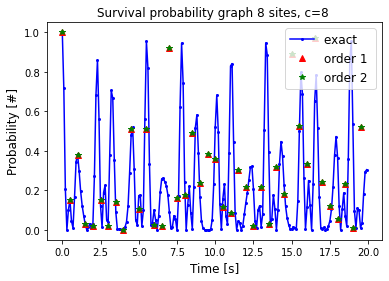

In [153]:
graph_8_exact_long(prob,8,time_eve(8,1,0,0,0,0,0,0,0)[0],time_eve(8,1,0,0,0,0,0,0,0)[1])
survivelprob_trotter8_2(20,Trot_8_2_1_long)
survivelprob_trotter8_3(20,Trot_8_3_1_long)

In [35]:
## 2d garphs 8 site system with trotter
u_1n=np.array([1,0,0,0,0,0,0,0])
u_2n=np.array([0,1,0,0,0,0,0,0])
u_3n=np.array([0,0,1,0,0,0,0,0])
u_4n=np.array([0,0,0,1,0,0,0,0])
u_5n=np.array([0,0,0,0,1,0,0,0])
u_6n=np.array([0,0,0,0,0,1,0,0])
u_7n=np.array([0,0,0,0,0,0,1,0])
u_8n=np.array([0,0,0,0,0,0,0,1])

def d2_8sites_trot(U): ##Crerates discrete p(x,t) as a matrix for the plot
    z=np.zeros([40,8])
    for i in range(0,8):
        for l in range (0,40):
            if i ==0 :
                z[l][i] = np.abs(np.matmul(u_1n,U[l]))**2
            if i ==1 :
                z[l][i] = np.abs(np.matmul(u_2n,U[l]))**2
            if i ==2 :
                z[l][i] = np.abs(np.matmul(u_3n,U[l]))**2
            if i ==3 :
                z[l][i] = np.abs(np.matmul(u_4n,U[l]))**2
            if i ==4 :
                z[l][i] = np.abs(np.matmul(u_5n,U[l]))**2
            if i ==5 :
                z[l][i] = np.abs(np.matmul(u_6n,U[l]))**2
            if i ==6 :
                z[l][i] = np.abs(np.matmul(u_7n,U[l]))**2
            if i ==7 :
                z[l][i] = np.abs(np.matmul(u_8n,U[l]))**2
            
              
    return z

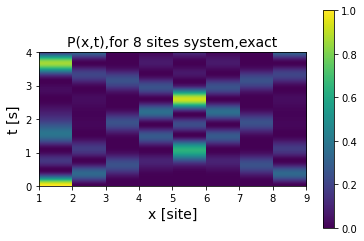

In [39]:
## Exact
##plot 2d graph P(x,t) for 8 sites
from matplotlib import pyplot as plt

Vspace=eye(8).columnspace()##construct the sites Vectors in the standart base
V_1=Vspace[0] ##vector for the site x=1
V_2=Vspace[1]
V_3=Vspace[2]
V_4=Vspace[3]
V_5=Vspace[4]
V_6=Vspace[5]
V_7=Vspace[6]
V_8=Vspace[7]

def d2_8sites(b,T,time_eve):##Crerates discrete p(x,t) as a matrix for the plot
    t = Symbol('t', real=True)
    c = Symbol('c', real=True) 
    func_1 = lambdify([c,t],prob(V_1,time_eve[1]))#prob func for x=1, meanning to be in site 1
    func_2 = lambdify([c,t],prob(V_2,time_eve[1]))
    func_3 = lambdify([c,t],prob(V_3,time_eve[1]))
    func_4 = lambdify([c,t],prob(V_4,time_eve[1]))
    func_5 = lambdify([c,t],prob(V_5,time_eve[1]))
    func_6 = lambdify([c,t],prob(V_6,time_eve[1]))
    func_7 = lambdify([c,t],prob(V_7,time_eve[1]))
    func_8 = lambdify([c,t],prob(V_8,time_eve[1]))
    c=b
    t=np.arange(0,T,0.01)
    z=np.zeros(8*int(T/0.01)).reshape(int(T/0.01),8)
    for j in range(0,8):
        for l in range (0,int(T/0.01)):
            if j ==0 :
                z[l][j] = func_1(c,t[l]).real
            if j ==1 :
                z[l][j] = func_2(c,t[l]).real
            if j ==2 :
                z[l][j] = func_3(c,t[l]).real
            if j ==3 :
                z[l][j] = func_4(c,t[l]).real
            if j ==4:
                z[l][j] = func_5(c,t[l]).real
            if j ==5:
                z[l][j] = func_6(c,t[l]).real
            if j == 6:
                z[l][j] = func_7(c,t[l]).real
            if j == 7:
                z[l][j] = func_8(c,t[l]).real
                       
    return z
plt.imshow( d2_8sites(5,4,time_eve(8,1,0,0,0,0,0,0,0)),extent=[1,9,0,4],interpolation='none',origin='lower') # plotting our solution          
plt.colorbar(ax.imshow(d2_8sites(8,4,time_eve(8,1,0,0,0,0,0,0,0))))## one have to change the functhion here as well
plt.title('P(x,t),for 8 sites system,exact,c=8', fontsize=14)
plt.xlabel('x [site]', fontsize=14)
plt.ylabel('t [s]', fontsize=14)
plt.show()

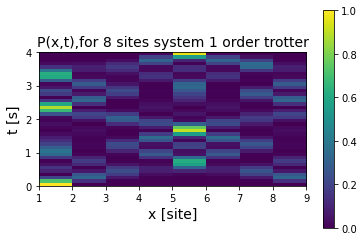

In [73]:
plt.imshow(( d2_8sites_trot(Trot_8_2_1)),extent=[1,9,0,4],interpolation='none',origin='lower') # plotting our solution 
plt.colorbar(ax.imshow(d2_8sites_trot(Trot_8_2_1)))## one have to change the functhion here as well
plt.title('P(x,t),for 8 sites system 1 order trotter', fontsize=14)
plt.xlabel('x [site]', fontsize=14)
plt.ylabel('t [s]', fontsize=14)
plt.show()

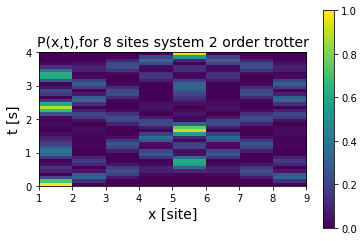

In [74]:
plt.imshow(( d2_8sites_trot(Trot_8_3_1)),extent=[1,9,0,4],interpolation='none',origin='lower') # plotting our solution 
plt.colorbar(ax.imshow(d2_8sites_trot(Trot_8_3_1)))## one have to change the functhion here as well
plt.title('P(x,t),for 8 sites system 2 order trotter', fontsize=14)
plt.xlabel('x [site]', fontsize=14)
plt.ylabel('t [s]', fontsize=14)
plt.show()